In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import random
import pandas as pd
from imageio import imread

In [3]:
DATUMS_PATH=os.getenv('DATUMS_PATH')

DATASET_NAME=os.getenv('DATASET_NAME')
#DATASET_NAME
DATUMS_PATH

'/home/dkube/work/dataset'

In [4]:
%pwd

'/home/dkube/work/workspace'

In [5]:
train = pd.read_csv(os.path.join(DATUMS_PATH,DATASET_NAME,'train.csv'))

In [6]:
test = pd.read_csv(os.path.join(DATUMS_PATH,DATASET_NAME,'test.csv'))

In [7]:
#randomly choose image and print
i = random.choice(train.index)
image_name = train.ID[i]
image = imread(os.path.join(DATUMS_PATH,DATASET_NAME,'Train',image_name))
print('Age :',train.Class[i])

Age : YOUNG


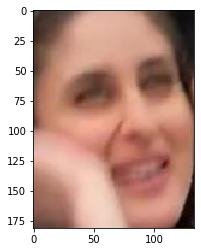

In [8]:
imshow(image)

In [9]:
from skimage.transform import resize

In [10]:
import numpy as np
temp = []
for image_name in train.ID:
    image_path = os.path.join(DATUMS_PATH,DATASET_NAME,'Train',image_name)
    image = imread(image_path)
    image = resize(image,(32,32))
    image = image.astype('float32')
    temp.append(image)
train_X= np.stack(temp)

In [11]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(DATUMS_PATH,DATASET_NAME, 'Test', img_name)
    img = imread(img_path)
    img = resize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [12]:
#Normalize images
train_x = train_X / 255.
test_x = test_x / 255.

In [13]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [14]:
import keras
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [15]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [16]:
input_num_units = (32,32,3)
hidden_num_units = 500
output_num_units = 3
epoch = 5
batch_size = 128


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [18]:
model = Sequential([
    InputLayer(input_shape = input_num_units),
    Flatten(),
    Dense(units=hidden_num_units,activation='relu'),
    Dense(units=output_num_units,activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_x,train_y,batch_size=batch_size,epochs=epoch)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
19906/19906 [==============================] - 10s 486us/step - loss: 1.0269 - acc: 0.5402
Epoch 2/5
19906/19906 [==============================] - 10s 490us/step - loss: 0.9698 - acc: 0.5428
Epoch 3/5
19906/19906 [==============================] - 9s 465us/step - loss: 0.9576 - acc: 0.5428
Epoch 4/5
19906/19906 [==============================] - 7s 367us/step - loss: 0.9543 - acc: 0.5428
Epoch 5/5
19906/19906 [==============================] - 10s 489us/step - loss: 0.9533 - acc: 0.5428


In [21]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epoch,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 9s 582us/step - loss: 0.9542 - acc: 0.5425 - val_loss: 0.9483 - val_acc: 0.5439
Epoch 2/5
15924/15924 [==============================] - 8s 497us/step - loss: 0.9541 - acc: 0.5425 - val_loss: 0.9482 - val_acc: 0.5439
Epoch 3/5
15924/15924 [==============================] - 8s 517us/step - loss: 0.9541 - acc: 0.5425 - val_loss: 0.9481 - val_acc: 0.5439
Epoch 4/5
15924/15924 [==============================] - 8s 493us/step - loss: 0.9540 - acc: 0.5425 - val_loss: 0.9481 - val_acc: 0.5439
Epoch 5/5
15924/15924 [==============================] - 9s 572us/step - loss: 0.9540 - acc: 0.5425 - val_loss: 0.9480 - val_acc: 0.5439


In [22]:
import tensorflow as tf

In [23]:
model_new=tf.keras.Sequential([
    tf.keras.layers.Conv2D(50,(3,3),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(100,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(100,(3,3),activation='relu'),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(hidden_num_units,activation='relu'),
    tf.keras.layers.Dense(output_num_units,activation='softmax'),
])

In [24]:
model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 50)        1400      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 100)       45100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 100)         90100     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 4803      
Total para

In [25]:
model_new.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model_new.fit(train_x,train_y,batch_size=batch_size,epochs=epoch)

Epoch 1/5
19906/19906 [==============================] - 96s 5ms/sample - loss: 0.9849 - acc: 0.5428
Epoch 2/5
19906/19906 [==============================] - 100s 5ms/sample - loss: 0.9532 - acc: 0.5428
Epoch 3/5
19906/19906 [==============================] - 97s 5ms/sample - loss: 0.9531 - acc: 0.5428
Epoch 4/5
19906/19906 [==============================] - 100s 5ms/sample - loss: 0.9532 - acc: 0.5428
Epoch 5/5
19906/19906 [==============================] - 98s 5ms/sample - loss: 0.9532 - acc: 0.5428


In [26]:
model_new.fit(train_x, train_y, batch_size=batch_size,epochs=epoch,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 85s 5ms/sample - loss: 0.9544 - acc: 0.5425 - val_loss: 0.9483 - val_acc: 0.5439
Epoch 2/5
15924/15924 [==============================] - 84s 5ms/sample - loss: 0.9544 - acc: 0.5425 - val_loss: 0.9482 - val_acc: 0.5439
Epoch 3/5
15924/15924 [==============================] - 85s 5ms/sample - loss: 0.9544 - acc: 0.5425 - val_loss: 0.9483 - val_acc: 0.5439
Epoch 4/5
15924/15924 [==============================] - 85s 5ms/sample - loss: 0.9544 - acc: 0.5425 - val_loss: 0.9485 - val_acc: 0.5439
Epoch 5/5
15924/15924 [==============================] - 83s 5ms/sample - loss: 0.9544 - acc: 0.5425 - val_loss: 0.9485 - val_acc: 0.5439


In [31]:
pred = model_new.predict_classes(test_x)
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv(os.path.join(DATUMS_PATH,DATASET_NAME,'sub.csv'),index=False)